<a href="https://colab.research.google.com/github/Kalyani-Moram/Walmart-Sales-Insights/blob/main/Capstone_project_Walmart_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Project - Walmart - 10.05.2025**

1.   List item
2.   List item



In [ ]:
#  Walmart Dataset - Info

# Feature Name                Description

# Store                       Store number
# Date                        Week of Sales
# Weekly_Sales                Sales for the given store in that week
# Holiday_Flag                If it is a holiday week (1=Holiday, 0=No Holiday)
# Temperature                 Temperature on the day of the sale
# Fuel_Price                  Cost of the fuel in the region
# CPI                         Consumer Price Index
# Unemployment                Unemployment Rate

**1. Problem Statement**

You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Exploratory & Statistical Analysis**

In [ ]:
df.describe().style.background_gradient(cmap='Greens').format("{:.2f}")

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [ ]:
# convert all column names into small case for data compatability.
df.columns=df.columns.str.lower()
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
store,0
date,0
weekly_sales,0
holiday_flag,0
temperature,0
fuel_price,0
cpi,0
unemployment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# to convert data column to datetime format
df['date'] = pd.to_datetime(df['date'],format='mixed')
df['date'].head()

,date
0,2010-05-02
1,2010-12-02
2,2010-02-19
3,2010-02-26
4,2010-05-03


**Trend of Weekly sales Vs Temp, Unemploymnet and CPI**

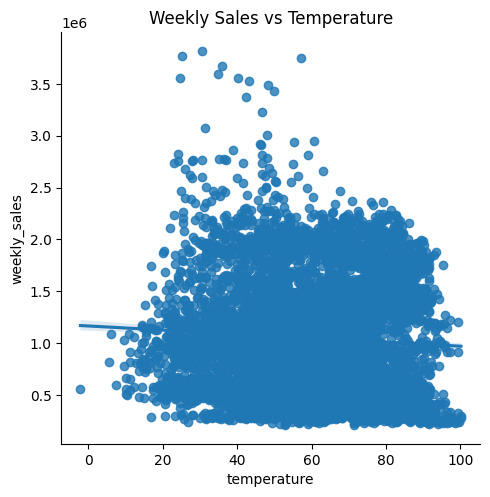

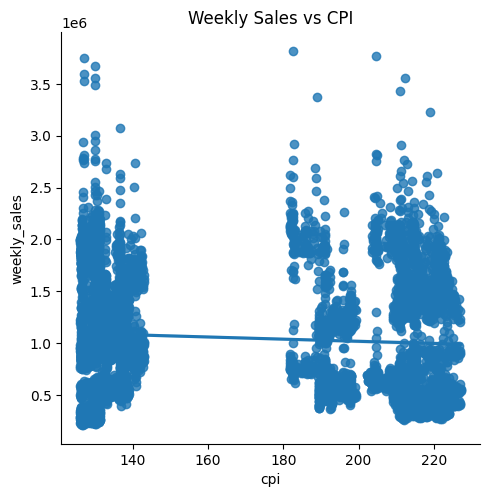

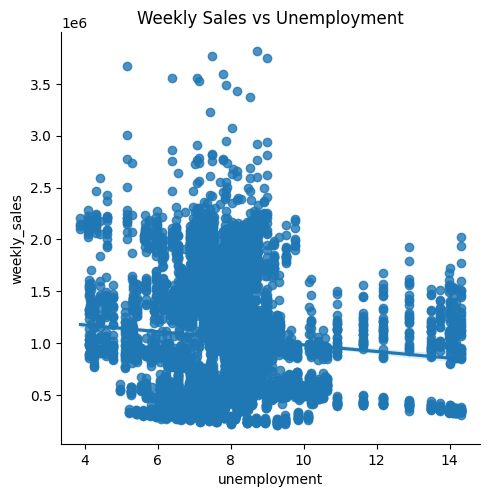

In [ ]:
# Plot Weekly Sales vs Temperature
sns.lmplot(x='temperature', y='weekly_sales', data=df)
plt.title('Weekly Sales vs Temperature')

# Plot Weekly Sales vs CPI
sns.lmplot(x='cpi', y='weekly_sales', data=df)
plt.title('Weekly Sales vs CPI')

# Plot Weekly Sales vs Unemployment
sns.lmplot(x='unemployment', y='weekly_sales', data=df)
plt.title('Weekly Sales vs Unemployment')

plt.show()


In [ ]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
col_list =list(df.columns)
col_list

['store',
 'date',
 'weekly_sales',
 'holiday_flag',
 'temperature',
 'fuel_price',
 'cpi',
 'unemployment']

**Check for outliers** - No null and No duplicate values in the given dataset

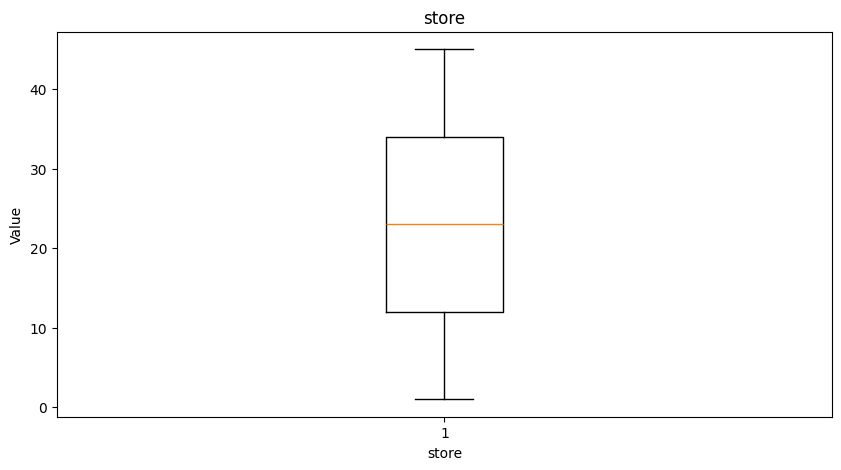

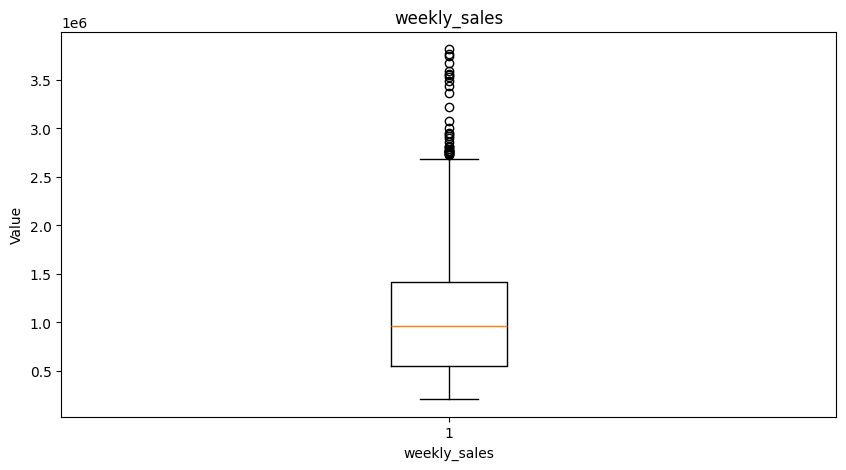

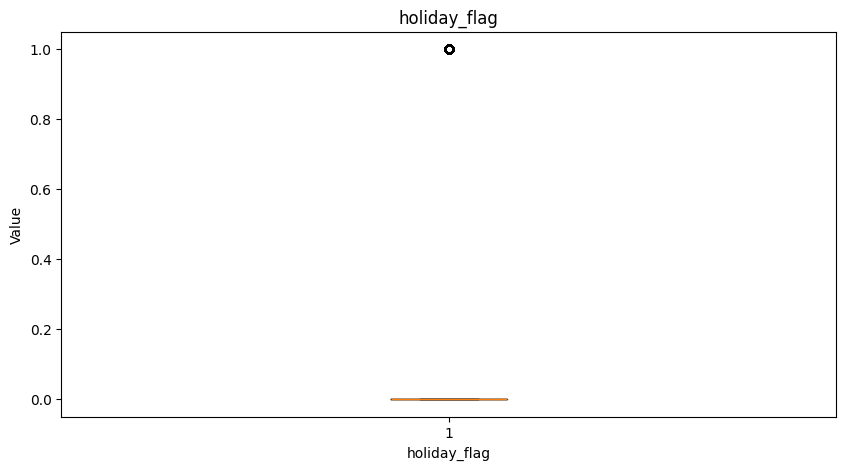

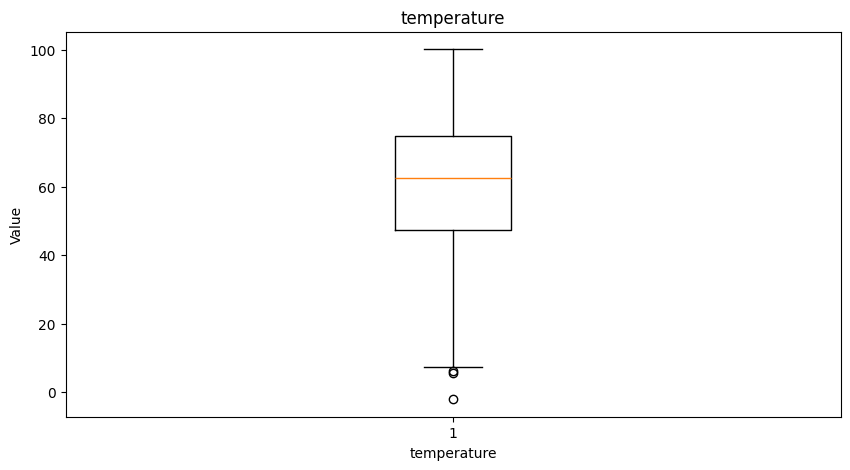

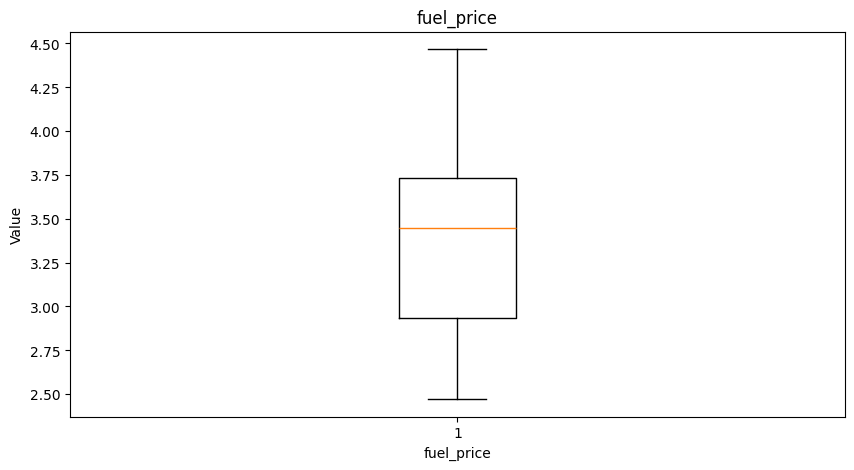

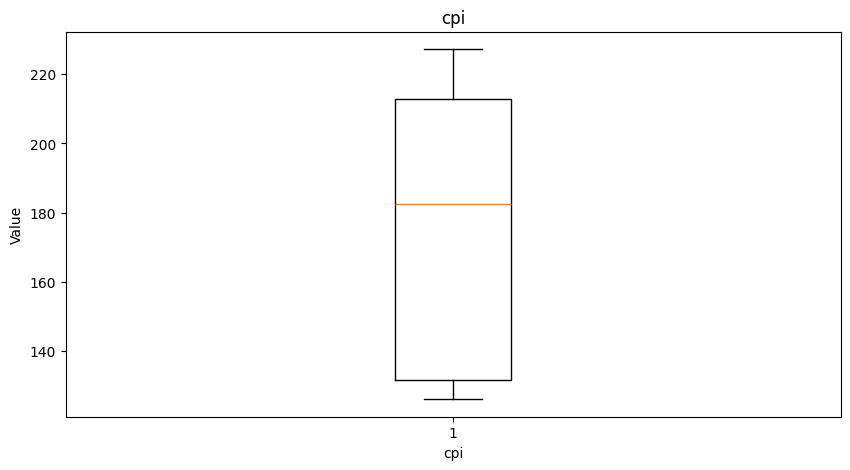

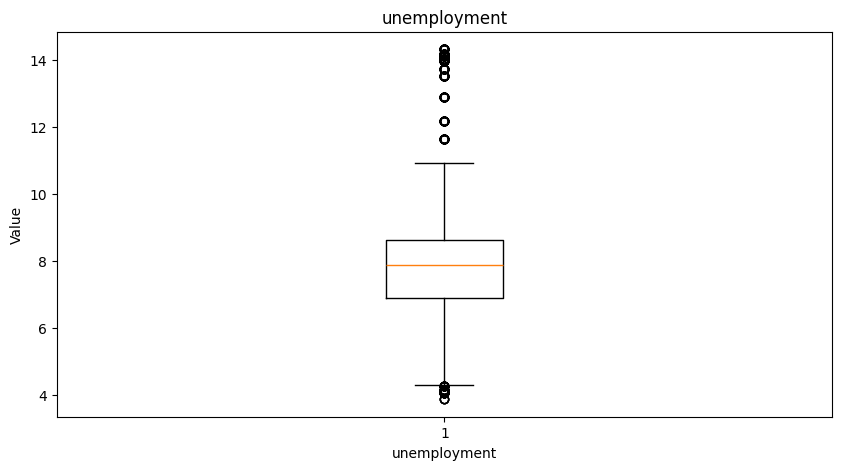

In [ ]:
for x in col_list:
  if df[x].dtypes in ['float64', 'int64']:
        plt.figure(figsize=(10, 5))
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.ylabel('Value')
        plt.title(f'{x}')
        plt.show()

In [ ]:
# we could see the outliers in the columns of Weekly sales, Temperatue, Holiday flag and Unemployment.

# columns --Store, CPI, Fuel Price has no outliers

**Handling Outliers**

In [ ]:
df.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [ ]:
# Make a copy of the dataset to avoid modifying the original data set.

filtered_df = df.copy()
filtered_df.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [ ]:
col_list_selected = ['weekly_sales','temperature', 'unemployment']

for x in col_list_selected:
    Q1 = filtered_df[x].quantile(0.25)
    Q3 = filtered_df[x].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = filtered_df[(filtered_df[x] >= lower_fence) & (filtered_df[x] <= upper_fence)]


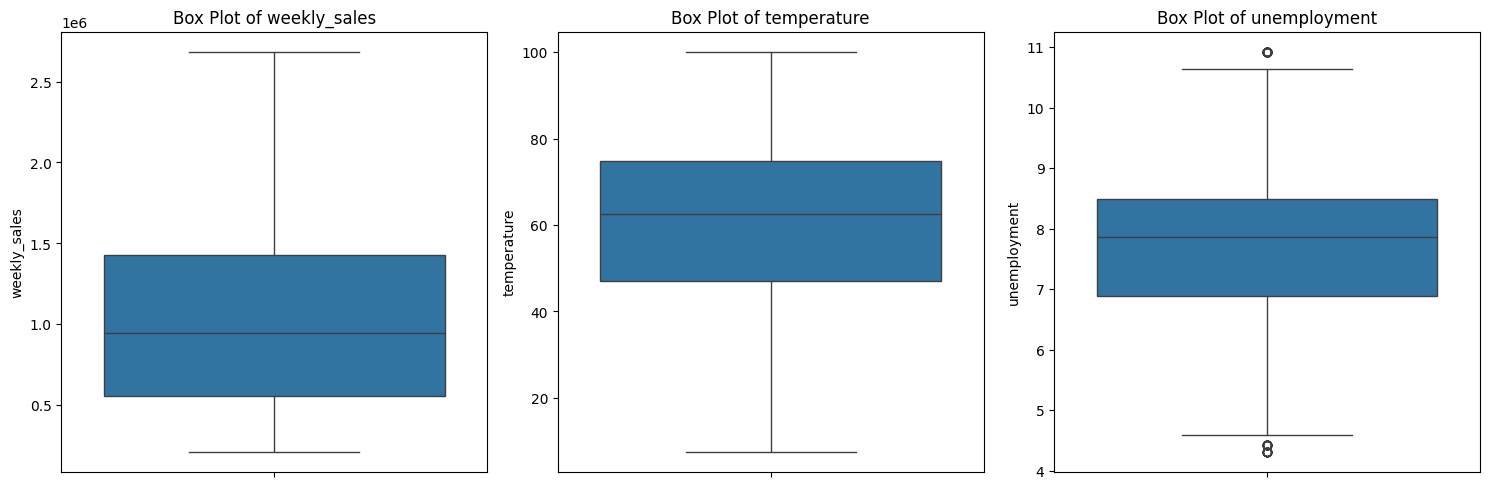

In [ ]:
# Plot boxplots for Weekly sales, temperatue and unemployment columns after removing outliers

plt.figure(figsize=(15, 5))

for i, col in enumerate(col_list_selected, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot in i-th position
    sns.boxplot(y=filtered_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
filtered_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


**scatter plot of weekly sales Vs temp, cpi, unemployment after Outlier removal**

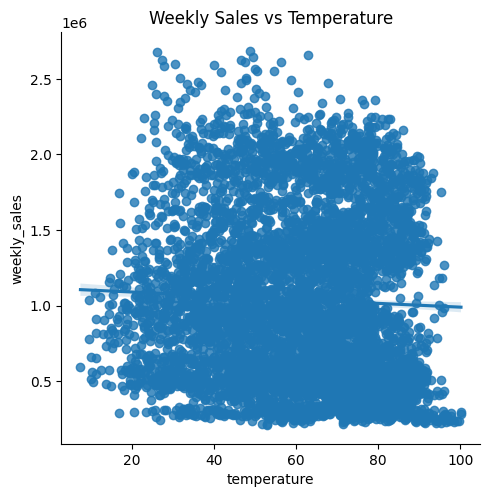

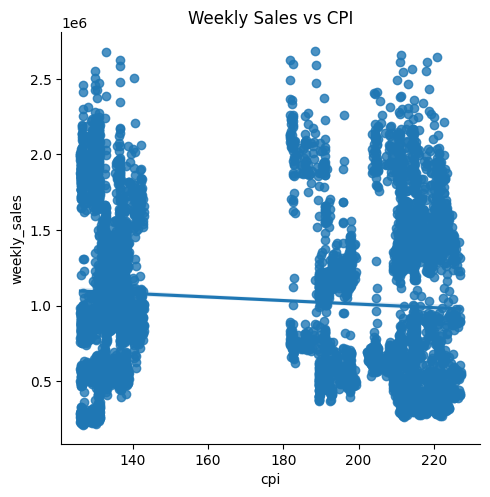

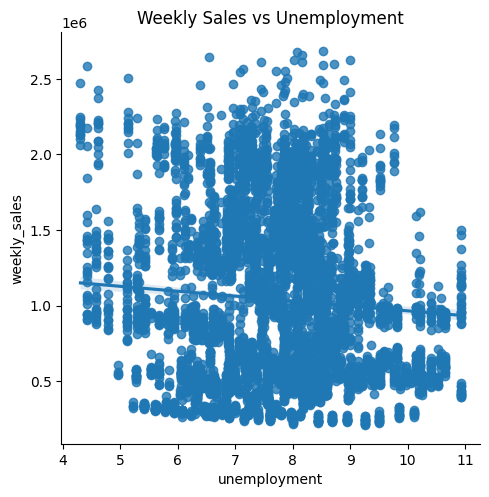

In [ ]:
# Plot Weekly Sales vs Temperature
sns.lmplot(x='temperature', y='weekly_sales', data=filtered_df)
plt.title('Weekly Sales vs Temperature')

# Plot Weekly Sales vs CPI
sns.lmplot(x='cpi', y='weekly_sales', data=filtered_df)
plt.title('Weekly Sales vs CPI')

# Plot Weekly Sales vs Unemployment
sns.lmplot(x='unemployment', y='weekly_sales', data=filtered_df)
plt.title('Weekly Sales vs Unemployment')

plt.show()


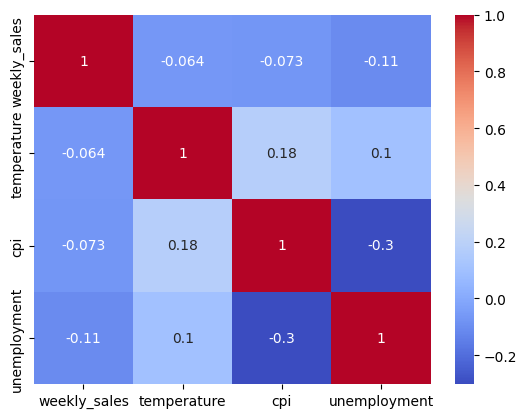

In [ ]:
# To see the correlation using heatmap - with outliers

corr = df[['weekly_sales', 'temperature', 'cpi', 'unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

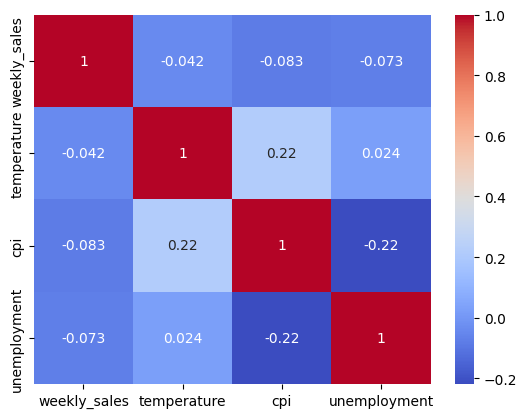

In [ ]:
# To see the correlation using heatmap with out outliers

corr = filtered_df[['weekly_sales', 'temperature', 'cpi', 'unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Pearson correlation matrices (numeric columns only)

corr_with = df.corr(numeric_only=True)
corr_without = filtered_df.corr(numeric_only=True)


In [ ]:
# Focus on how each feature correlates with weekly_sales
sales_corr_with = corr_with['weekly_sales']
sales_corr_without = corr_without['weekly_sales']

# Compare the difference
corr_diff = (sales_corr_with - sales_corr_without).abs().sort_values(ascending=False)

print("Difference in correlation with 'weekly_sales':")
print(corr_diff)


Difference in correlation with 'weekly_sales':
unemployment    0.033084
temperature     0.022124
store           0.015978
holiday_flag    0.012501
cpi             0.010343
fuel_price      0.010200
weekly_sales    0.000000
Name: weekly_sales, dtype: float64


In [ ]:
##Correlation Change Summary

**Feature	       Correlation Change	          Interpretation**:

unemployment	    0.033	                  Minimal effect — slightly impacted
temperature	      0.022	                  Very small change — no significant distortion
store	            0.016	                  Not affected by outliers
holiday_flag	    0.013	                  Almost unchanged; outliers may align with holidays
cpi	              0.010	                  Very stable
fuel_price	      0.010	                  Very stable
weekly_sales	    0.000	                  Self-correlation, as expected

**Conclusion:**

Outliers did not significantly distort the correlations between features and weekly_sales.

Since all correlation differences are very small (< 0.05), we confident that:

The relationships between variables are stable, with or without outliers.

The outliers are likely not harmful and may even represent real business events (e.g.holidays, promotions, seasonal peaks).

**We are proceeding with outliers data, i.e Original dataset (df) instead filtered data set (filtered_df)**

In [ ]:
df.head(2)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106


In [ ]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

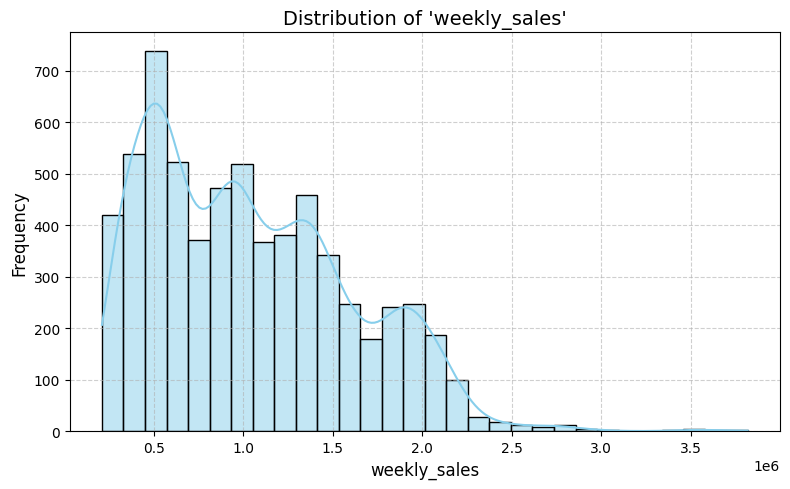

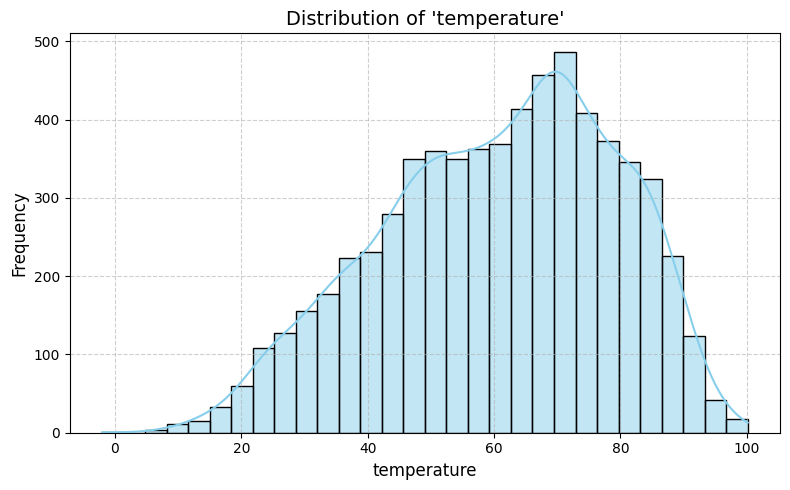

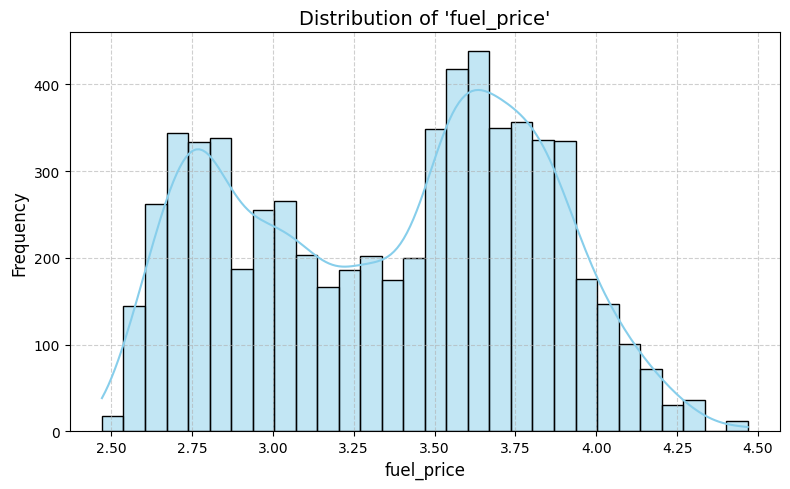

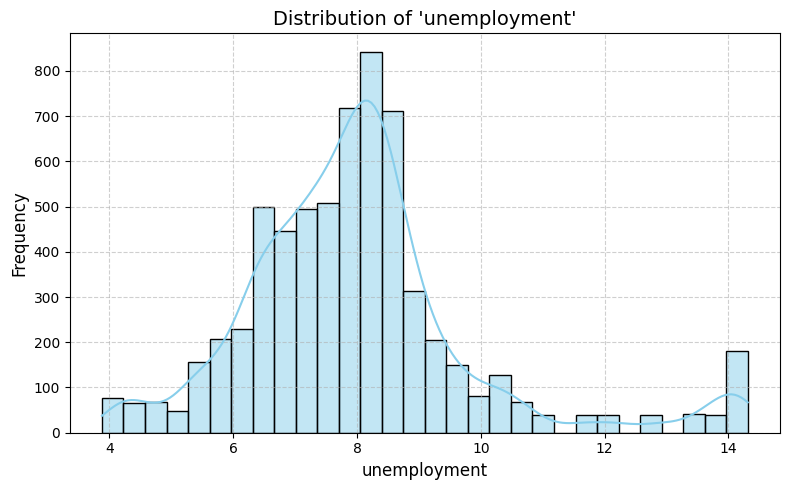

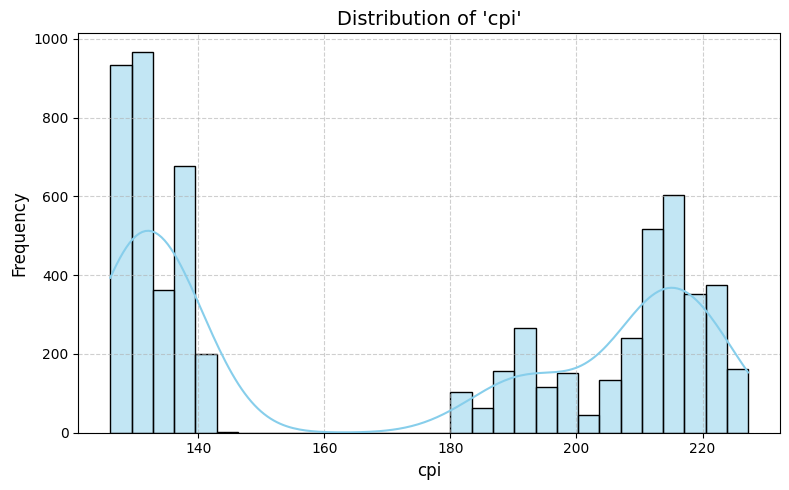

In [ ]:
# List of numeric features to visualize

features = ['weekly_sales', 'temperature', 'fuel_price', 'unemployment', 'cpi']

# Plot histogram + KDE for each feature
for col in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


**Conclusion**

Weekly Sales: The histogram of weekly sales indicates a right-skewed distribution, suggesting that there are relatively fewer instances of very high sales compared to lower sales amounts. This could indicate occasional spikes in sales or a few high-performing periods.

Temperature and Unemployment: The histograms of temperature and unemployment show approximately normal distributions, indicating that the majority of the data points are centered around the mean with relatively few outliers. This suggests that these factors may follow typical patterns without significant deviations.

Fuel Price, CPI: The histograms of fuel price and CPI exhibit bimodal distributions, suggesting the presence of two distinct peaks or modes in the data. This could imply the existence of different market conditions or states within the dataset, potentially indicating varying economic situations or consumer behaviors.

**Feature Engineering**

Date Features: Extracting additional information from the 'Date' column such as day, month, year, day of the week, and whether it's a holiday or not. This can provide seasonality information and holiday effects. List of Numerical Features

weekly sales temperature fuel price cpi

In [ ]:
from datetime import datetime
from scipy import stats

In [ ]:
# functions to map dates to seasons

def date_to_season(date):
    # Extract month from date string and convert it to integer
    month = datetime.strptime(date, "%Y-%m-%d").month

    # Map months to seasons
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Apply date_to_season function to create a new column

df["season"] = df["date"].apply(lambda x: date_to_season(x.strftime("%Y-%m-%d")))

In [ ]:
df['date'].head(2)

,date
0,2010-05-02
1,2010-12-02


In [ ]:
df.head(2)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Winter


In [ ]:
# Extract year from the 'date' column

df['year'] = df['date'].dt.year

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Extract month name from the 'date' column
df['month_name'] = df['date'].dt.month_name()

# Extract day from the 'date' column
df['day'] = df['date'].dt.day

df['week'] = df['date'].dt.isocalendar().week

# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) from the 'date' column

df['day_of_week'] = df['date'].dt.dayofweek

df.sample(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season,year,month,month_name,day,week,day_of_week
3410,24,2012-01-06,1467722.19,0,71.79,3.915,138.113807,8.983,Winter,2012,1,January,6,1,4
2636,19,2011-04-15,1392093.04,0,48.67,3.981,134.278467,7.658,Spring,2011,4,April,15,15,4
4461,32,2010-08-20,1189887.86,0,71.46,2.732,190.294824,9.017,Summer,2010,8,August,20,33,4


In [ ]:
df.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season,year,month,month_name,day,week,day_of_week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Spring,2010,5,May,2,17,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Winter,2010,12,December,2,48,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Winter,2010,2,February,19,7,4


In [ ]:
filtered_df.head(2)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106


In [ ]:
# To see the best months for sales

month_wise_weekly_sales = df.groupby('month')['weekly_sales'].mean()
month_wise_weekly_sales.sort_values(ascending=False).round().head()

,weekly_sales
month,
12,1210255.0
11,1133751.0
6,1064848.0
2,1054597.0
8,1044874.0


In [ ]:
# to see best years for sale

year_wise_sales= df.groupby('year')['weekly_sales'].mean()
year_wise_sales.sort_values(ascending=False).round()

,weekly_sales
year,
2010,1059670.0
2011,1046239.0
2012,1033660.0


<Axes: xlabel='month'>

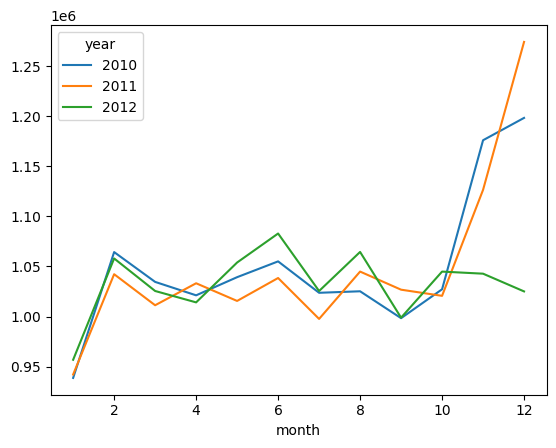

In [ ]:
monthly_sales = pd.pivot_table(df, values = "weekly_sales", columns = "year", index = "month")
monthly_sales.plot()

**a. To determine whether weekly sales are affected by the unemployment rate, and which stores are suffering the most**

In [ ]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'season', 'year', 'month',
       'month_name', 'day', 'week', 'day_of_week'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Initialize list to store results
store_results = []

# Loop through each unique store
for store in df['store'].unique():
    # Filter rows for the current store
    store_df = df[df['store'] == store]

    # Drop missing values
    store_df = store_df[['weekly_sales', 'unemployment']].dropna()

    # Skip if not enough data points
    if store_df.shape[0] < 2:
        continue

    # Define features and target
    X = store_df[['unemployment']]
    y = store_df['weekly_sales']

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficient
    coef = model.coef_[0]

    # Store result
    store_results.append({'store': store, 'weekly_sales': store_df['weekly_sales'].mean(), 'coefficient': coef})

# Create a DataFrame from results
results_df = pd.DataFrame(store_results)

# Sort by most negative impact
suffering_stores = results_df.sort_values(by='coefficient')

# Display top 5 most affected stores with weekly sales and coefficient
print(suffering_stores.head(5))


    store  weekly_sales    coefficient
40     41  1.268125e+06 -166181.375633
38     39  1.450668e+06 -119050.372488
16     17  8.935814e+05  -90832.279462
19     20  2.107677e+06  -86225.540313
3       4  2.094713e+06  -63122.487555


**A negative coefficient means higher unemployment → lower sales**

The more negative the coefficient, the worse the store suffers

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

To determine if weekly sales show a seasonal trend, and when and why, we need to analyze patterns in sales over time. Seasonal trends are typically recurring patterns tied to time of year — like holidays, weather, or consumer behavior.

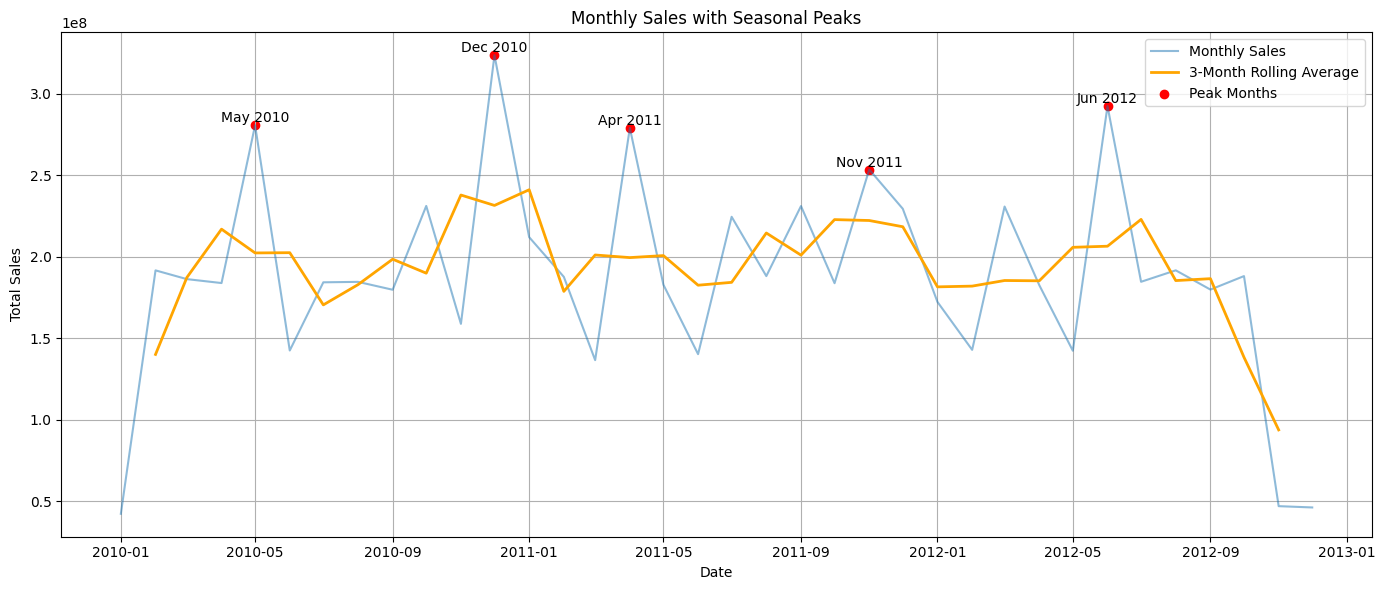

In [ ]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Create a 'year_month' column for grouping
df['year_month'] = df['date'].dt.to_period('M')

# Group by year-month
monthly_sales = df.groupby('year_month')['weekly_sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # convert PeriodIndex to Timestamp to plot data on timeline

# Optional: smooth with 3-month rolling average
rolling_sales = monthly_sales.rolling(3, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', alpha=0.5)
plt.plot(rolling_sales.index, rolling_sales.values, label='3-Month Rolling Average', linewidth=2, color='orange')

# Highlight peaks (top 5 months)
top_months = monthly_sales.sort_values(ascending=False).head(5)
plt.scatter(top_months.index, top_months.values, color='red', label='Peak Months')
for date, value in top_months.items():
    plt.text(date, value, f'{date.strftime("%b %Y")}', ha='center', va='bottom')

plt.title('Monthly Sales with Seasonal Peaks')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations and Reasons**

Likely Reasons Behind Each Sales Peak:

Peak Month	Possible Cause(s):

*   May 2010	Mother's Day, Memorial Day (US shopping + travel), early  summer  
*   Dec 2010	Christmas, holiday shopping, post-Thanksgiving surge
*   Apr 2011	Easter (April 24, 2011), spring cleaning, tax refund season
    promotions
*   Nov 2011	Black Friday, Thanksgiving week (major retail peak)
*   June 2012	Father's Day, summer gear sales, pre-July 4th promotions

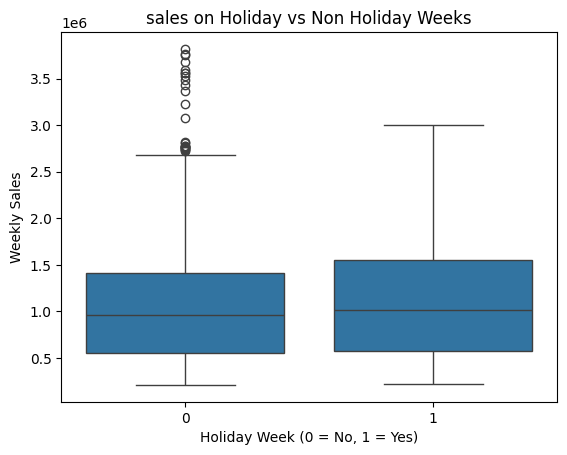

In [ ]:
sns.boxplot(x='holiday_flag', y='weekly_sales', data=df)
plt.title('sales on Holiday vs Non Holiday Weeks')
plt.xlabel('Holiday Week (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
df.groupby('holiday_flag')['weekly_sales'].mean().round()

,weekly_sales
holiday_flag,
0,1041256.0
1,1122888.0


**C. Does temperature affect the weekly sales in any manner?**

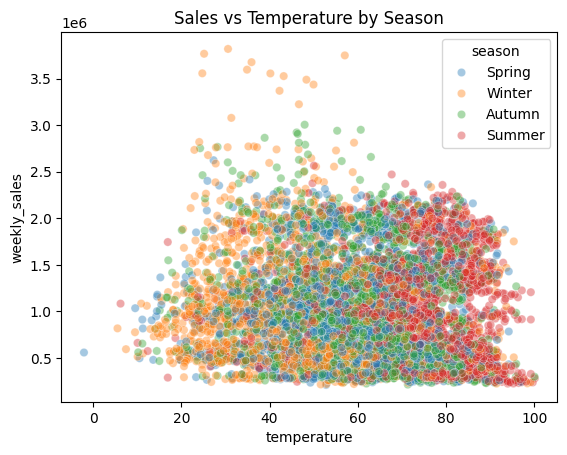

In [ ]:
sns.scatterplot(x='temperature', y='weekly_sales', hue='season', data=df, alpha=0.4)
plt.title('Sales vs Temperature by Season')
plt.show()


**Sales are relatively high when the temperature range is between 20 to 60 (season is winter)**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Group data by store
store_results = []

for store in df['store'].unique():
    store_df = df[df['store'] == store]

    # Drop missing values
    store_df = df[['weekly_sales', 'temperature']].dropna()

    # Features (X) and target (y)
    x = store_df[['temperature']]
    y = store_df['weekly_sales']

    # Fit linear regression
    model = LinearRegression()
    model.fit(x, y)

    # Coefficient tells us how sensitive sales are to temperature
    coef = model.coef_[0]


    # Store result
    store_results.append({'store': store, 'weekly_sales': store_df['weekly_sales'].mean(), 'coefficient': coef})

# Create result DataFrame
results_df = pd.DataFrame(store_results)

# Stores with most negative coefficients are most affected
suffering_stores = results_df.sort_values(by='coefficient')

print(suffering_stores.head(5))  # Most negatively affected stores

   store  weekly_sales  coefficient
0      1  1.046965e+06 -1952.419227
1      2  1.046965e+06 -1952.419227
2      3  1.046965e+06 -1952.419227
3      4  1.046965e+06 -1952.419227
4      5  1.046965e+06 -1952.419227


**d. How is the Consumer Price index (CPI) affecting the weekly sales of various stores?**

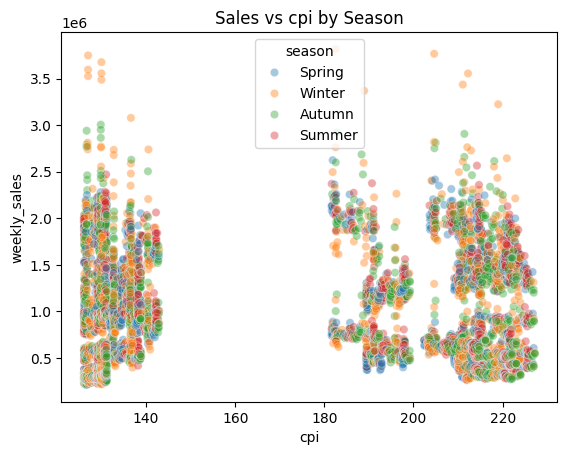

In [ ]:
sns.scatterplot(x='cpi', y='weekly_sales', hue='season', data=df, alpha=0.4)
plt.title('Sales vs cpi by Season')
plt.show()

In [ ]:
correlation_cpi = df[['cpi', 'weekly_sales']].corr()
print(correlation_cpi)

                   cpi  weekly_sales
cpi           1.000000     -0.072634
weekly_sales -0.072634      1.000000


This value (-0.07) is very close to 0, indicating no strong linear relationship.

The slight negative correlation suggests that:

As CPI increases, weekly sales very slightly decrease — but not in a statistically meaningful way.

**e. Top performing stores according to the historical data**

In [ ]:
top_total_sales = df.groupby('store')['weekly_sales'].sum().sort_values(ascending=False)

print(top_total_sales.head(5))  # Top 5 performing stores by total sales


store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: weekly_sales, dtype: float64


**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

In [ ]:
# Total sales per store
total_sales = df.groupby('store')['weekly_sales'].sum()

# Best and worst stores
best_store = total_sales.idxmax()
worst_store = total_sales.idxmin()

best_sales = total_sales.max()
worst_sales = total_sales.min()

print(f"🏆 Best Performing Store: Store {best_store} with total sales: {best_sales:,.2f}")
print(f"🔻 Worst Performing Store: Store {worst_store} with total sales: {worst_sales:,.2f}")


🏆 Best Performing Store: Store 20 with total sales: 301,397,792.46
🔻 Worst Performing Store: Store 33 with total sales: 37,160,221.96


In [ ]:
# Calculate the Difference and Significance
diff = best_sales - worst_sales
percentage_difference= (diff / best_sales) * 100


print(f"\n Difference in sales: {diff:,.2f}")
print(f"\nPercentage difference/significance : {percentage_difference:.2f}%")



 Difference in sales: 264,237,570.50

Percentage difference/significance : 87.67%


**Understanding the Output**

Difference in Sales: 264,237,570.50

This is the absolute difference between the best and worst months' sales.

Percentage Difference: 87.67%

This indicates that the worst sales month is 87.6% lower than the best sales month, which is a huge drop in sales, suggesting significant variability.

**2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller

In [ ]:
df.set_index('date', inplace=True) #seting date as index

In [ ]:
df.head(2)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season,year,month,month_name,day,week,day_of_week,year_month
date,,,,,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,Spring,2010,5,May,2,17,6,2010-05
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,Winter,2010,12,December,2,48,3,2010-12


In [ ]:
# considering df is our DataFrame and 'date' is the index

# Confirm it's a datetime index just in case
df.index = pd.to_datetime(df.index)

# Group weekly sales by store and date (since date is the index, no need to recreate it)
weekly_sales = df.groupby(['store', df.index])['weekly_sales'].sum().reset_index()
# Rename date column after reset_index
weekly_sales.rename(columns={'index': 'date'}, inplace=True)

# Prepare result container
forecast_df = pd.DataFrame()

# Loop through each store to build individual time series models
for store in weekly_sales['store'].unique():
    store_data = weekly_sales[weekly_sales['store'] == store].copy()
    store_data.set_index('date', inplace=True)

    # Ensure weekly frequency, with missing weeks filled
    store_data = store_data.asfreq('W-MON') #changing the frequency of the time series data to weekly, with each week starting on Monday.

    store_data['weekly_sales'].fillna(method='ffill', inplace=True)

    # Fit SARIMA model

    model = SARIMAX(store_data['weekly_sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    results = model.fit(disp=False)

    # Forecast 12 future weeks

    forecast = results.get_forecast(steps=12)
    forecast_index = pd.date_range(start=store_data.index[-1] + timedelta(weeks=1), periods=12, freq='W-MON')
    forecast_values = forecast.predicted_mean

    # Save forecast
    temp_df = pd.DataFrame({
        'store': store,
        'date': forecast_index,
        'forecast_sales': forecast_values
    })
    forecast_df = pd.concat([forecast_df, temp_df])

# Final cleanup

forecast_df.reset_index(drop=True, inplace=True)
print(forecast_df.head())


<ipython-input-80-ace208375be3>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data['weekly_sales'].fillna(method='ffill', inplace=True)
<ipython-input-80-ace208375be3>:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store_data['weekly_sales'].fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

   store       date  forecast_sales
0      1 2012-12-17    1.562338e+06
1      1 2012-12-24    1.553036e+06
2      1 2012-12-31    1.544807e+06
3      1 2013-01-07    1.550774e+06
4      1 2013-01-14    1.560315e+06


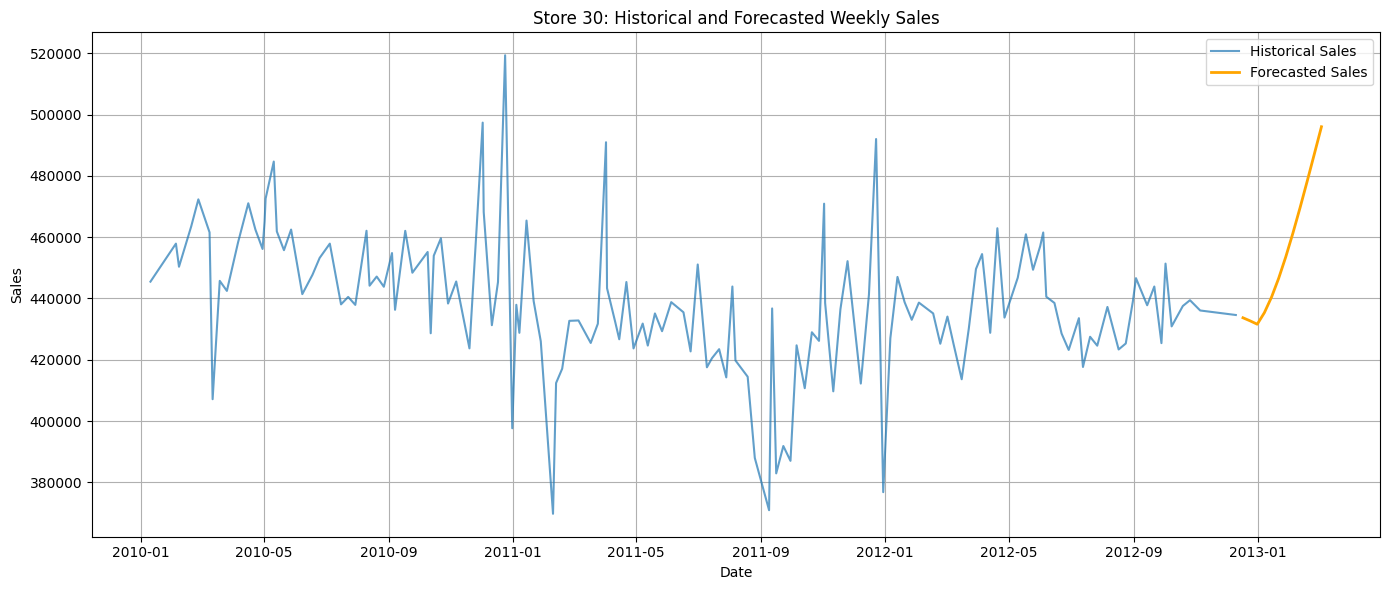

In [ ]:
# Example: Plot for one store (e.g., store 30)

store = 30  # You can change this to any store number

# Check if the store exists in your data
if store in weekly_sales['store'].unique() and store in forecast_df['store'].unique():

    # Filter the historical and forecast data
    historical = weekly_sales[weekly_sales['store'] == store]
    forecast = forecast_df[forecast_df['store'] == store]

    # Plot the data
    plt.figure(figsize=(14, 6))
    plt.plot(historical['date'], historical['weekly_sales'], label='Historical Sales', alpha=0.7)
    plt.plot(forecast['date'], forecast['forecast_sales'], label='Forecasted Sales', color='orange', linewidth=2)
    plt.title(f'Store {store}: Historical and Forecasted Weekly Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print(f"Store {store} not found in either weekly_sales or forecast_df.")


In [ ]:
import matplotlib.pyplot as plt

store = 2045  # You can change this to any store number

# Check if the store exists in your data
if store in weekly_sales['store'].unique() and store in forecast_df['store'].unique():

    # Filter the historical and forecast data
    historical = weekly_sales[weekly_sales['store'] == store]
    forecast = forecast_df[forecast_df['store'] == store]

    # Plot the data
    plt.figure(figsize=(14, 6))
    plt.plot(historical['date'], historical['weekly_sales'], label='Historical Sales', alpha=0.7)
    plt.plot(forecast['date'], forecast['forecast_sales'], label='Forecasted Sales', color='orange', linewidth=2)
    plt.title(f'Store {store}: Historical and Forecasted Weekly Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print(f"Store {store} not found in either weekly_sales or forecast_df.")


Store 2045 not found in either weekly_sales or forecast_df.
